# Task 2:  Car Price Predictor

## Importing Libraries & Dependecies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
import warnings

%matplotlib inline
warnings.simplefilter(action='ignore')

## Loading and Exploring Dataset

In [2]:
df = pd.read_csv('Dataset.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Data Preprocessing

In [7]:
df['Age'] = 2023 - df['Year']
df.drop('Year',axis=1,inplace = True)

In [8]:
df.rename(columns = {'Selling_Price':'Selling_Price(lacs)','Present_Price':'Present_Price(lacs)','Owner':'Past_Owners'},inplace = True)

## Exploratory Data Analysis (EDA)

In [9]:
df.columns

Index(['Car_Name', 'Selling_Price(lacs)', 'Present_Price(lacs)', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Past_Owners', 'Age'],
      dtype='object')

### Plotting Categorical Features Distribution

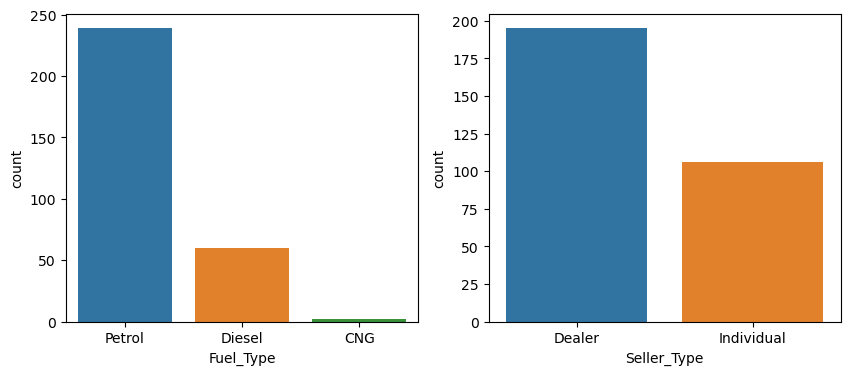

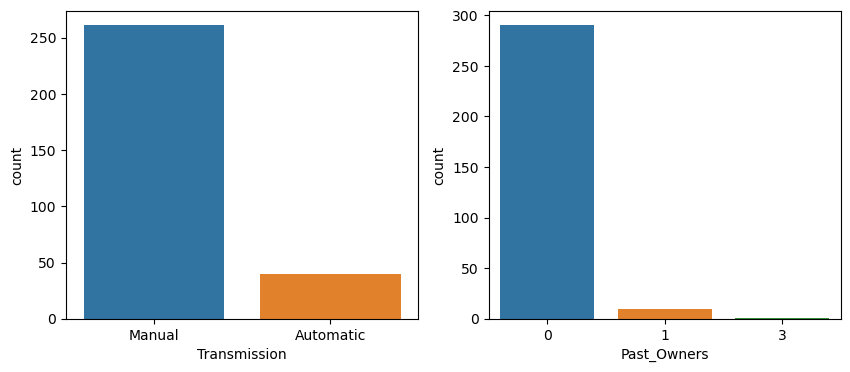

In [10]:
cat_cols = ['Fuel_Type','Seller_Type','Transmission','Past_Owners']
i=0
while i < 4:
    fig = plt.figure(figsize=[10,4])
    plt.subplot(1,2,1)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    plt.subplot(1,2,2)
    sns.countplot(x=cat_cols[i], data=df)
    i += 1
    plt.show()

### Plotting Numeric Features Distribution

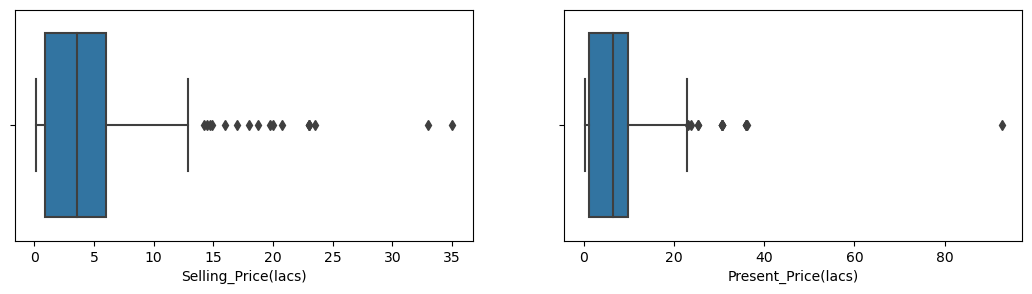

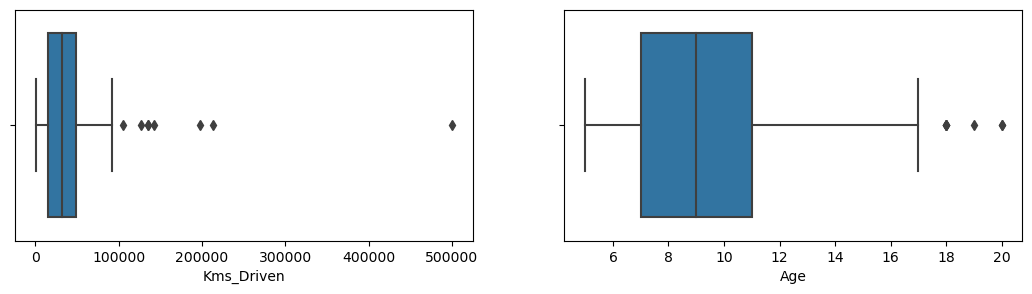

In [11]:
num_cols = ['Selling_Price(lacs)','Present_Price(lacs)','Kms_Driven','Age']
i=0
while i < 4:
    fig = plt.figure(figsize=[13,3])
    plt.subplot(1,2,1)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    plt.subplot(1,2,2)
    sns.boxplot(x=num_cols[i], data=df)
    i += 1
    plt.show()

### Getting the Outliers Data

In [12]:
df[df['Present_Price(lacs)'] > df['Present_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,6
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,13


In [13]:
df[df['Selling_Price(lacs)'] > df['Selling_Price(lacs)'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
63,fortuner,23.5,35.96,47000,Diesel,Dealer,Automatic,0,8
64,fortuner,33.0,36.23,6000,Diesel,Dealer,Automatic,0,6
86,land cruiser,35.0,92.60,78000,Diesel,Dealer,Manual,0,13


In [14]:
df[df['Kms_Driven'] > df['Kms_Driven'].quantile(0.99)]

,Car_Name,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
84,innova,3.49,13.46,197176,Diesel,Dealer,Manual,0,18
179,Honda Karizma,0.31,1.05,213000,Petrol,Individual,Manual,0,13
196,Activa 3g,0.17,0.52,500000,Petrol,Individual,Automatic,0,15


### Plotting the Correlation Matrix

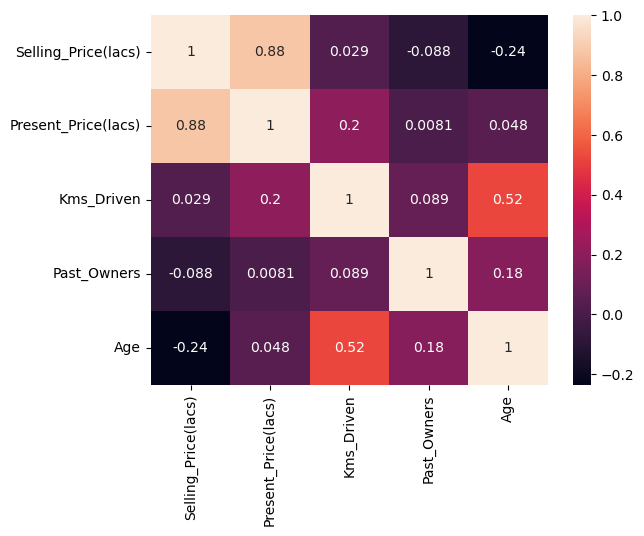

In [15]:
sns.heatmap(df.corr(), annot=True)
plt.show()

## Data Preparation

### Creating Dummies for Categorical Features

In [16]:
df.drop(labels='Car_Name',axis= 1, inplace = True)

In [17]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Fuel_Type,Seller_Type,Transmission,Past_Owners,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,9
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,10
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,6
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,12
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,9


In [18]:
df = pd.get_dummies(data = df,drop_first=True) 

In [19]:
df.head()

,Selling_Price(lacs),Present_Price(lacs),Kms_Driven,Past_Owners,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,9,0,1,0,1
1,4.75,9.54,43000,0,10,1,0,0,1
2,7.25,9.85,6900,0,6,0,1,0,1
3,2.85,4.15,5200,0,12,0,1,0,1
4,4.60,6.87,42450,0,9,1,0,0,1


### Splitting data to Train and Test

In [20]:
y = df['Selling_Price(lacs)']
X = df.drop('Selling_Price(lacs)',axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (240, 8)
x test:  (61, 8)
y train:  (240,)
y test:  (61,)


## Regression models
1. Linear Regression 
2. Ridge Regression
3. Lasso Regression
4. Random Forest Regression
5. Gradient Boosting regression

## Model Training & Evaluation Function

In [22]:
CV = []
R2_train = []
R2_test = []
def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

## 1.Linear Regression Model

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912189 0.89838688 0.82980069 0.81769076 0.76113925]
Train CV mean : 0.84


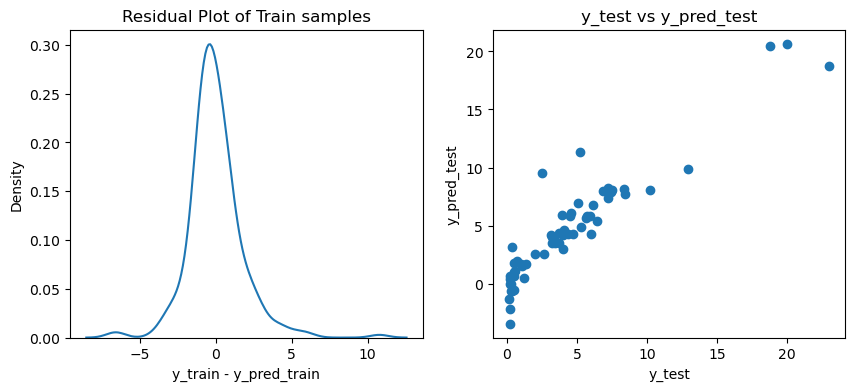

In [23]:
lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

## 2.Ridge Regression Model

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.89912126 0.8983878  0.82980292 0.81769305 0.71854676]
Train CV mean : 0.83


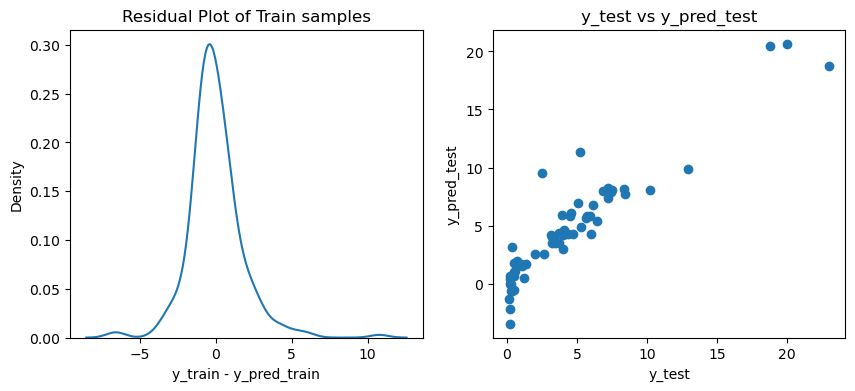

In [24]:
rg = Ridge()
alpha = np.logspace(-3,3,num=14)
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))
car_pred_model(rg_rs,"ridge.pkl")

## 3.Lasso Regression Model

Train R2-score : 0.88
Test R2-score : 0.86
Train CV scores : [0.8990973  0.89975361 0.8301628  0.81769086 0.70210321]
Train CV mean : 0.83


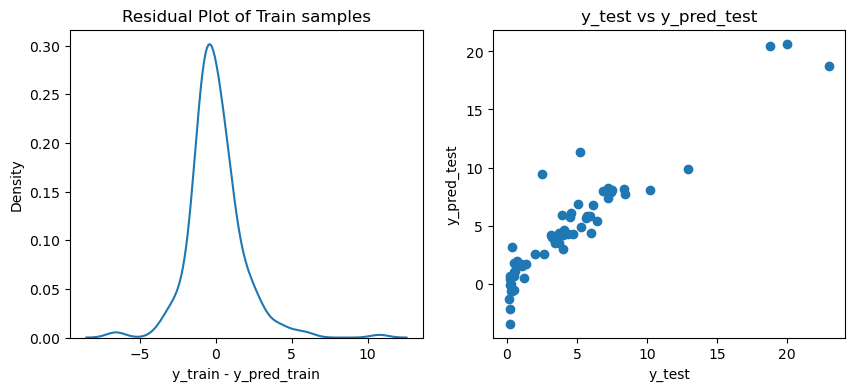

In [25]:
ls = Lasso()
alpha = np.logspace(-3,3,num=14)
ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
car_pred_model(ls_rs,"lasso.pkl")

## 4.Random Forest Regression Model

Train R2-score : 0.88
Test R2-score : 0.94
Train CV scores : [0.77360467 0.90712103 0.8325105  0.90439467 0.64444954]
Train CV mean : 0.81


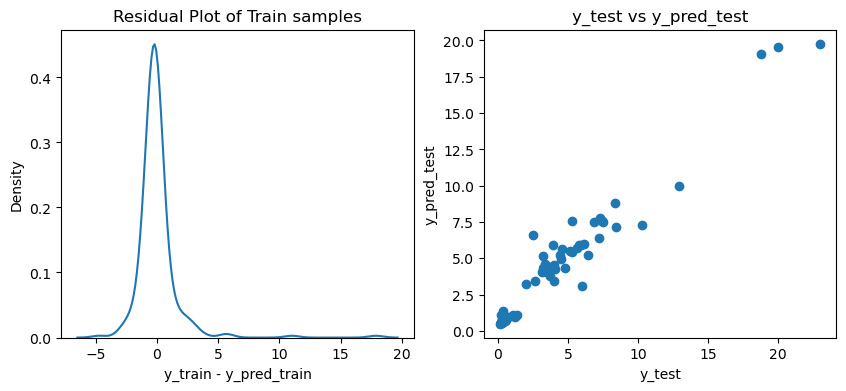

In [26]:
rf = RandomForestRegressor()
n_estimators=list(range(500,1000,100))
max_depth=list(range(4,9,4))
min_samples_split=list(range(4,9,2))
min_samples_leaf=[1,2,5,7]
max_features=['auto','sqrt']
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
car_pred_model(rf_rs,'random_forest.pkl')

In [27]:
print(rf_rs.best_estimator_)

RandomForestRegressor(max_depth=8, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=6, n_estimators=500)


## 5.Gradient Boosting Regression Model

Train R2-score : 1.0
Test R2-score : 0.92
Train CV scores : [0.94551457 0.95471944 0.83362576 0.91580246 0.68632918]
Train CV mean : 0.87


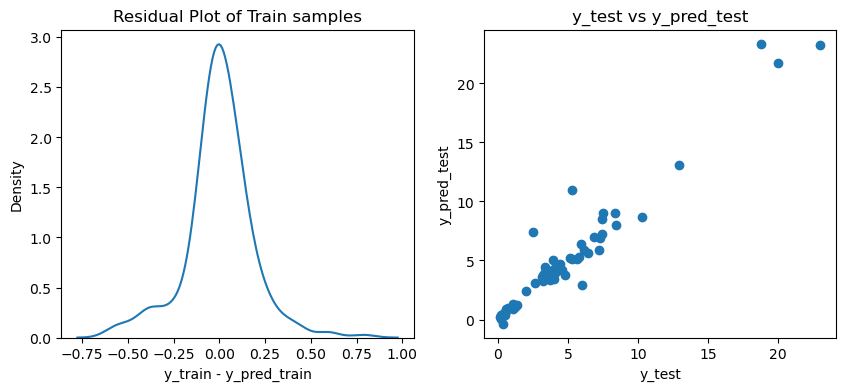

In [28]:
gb = GradientBoostingRegressor()
learning_rate = [0.001, 0.01, 0.1, 0.2]
n_estimators=list(range(500,1000,100))
max_depth=list(range(4,9,4))
min_samples_split=list(range(4,9,2))
min_samples_leaf=[1,2,5,7]
max_features=['auto','sqrt']
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}
gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
car_pred_model(gb_rs,"gradient_boosting.pkl")

In [29]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)

,Model,R Squared(Train),R Squared(Test),CV score mean(Train)
0,LinearRegression,0.88,0.86,0.84
1,Ridge,0.88,0.86,0.83
2,Lasso,0.88,0.86,0.83
3,RandomForestRegressor,0.88,0.94,0.81
4,GradientBoostingRegressor,1.00,0.92,0.87
